<a href="https://colab.research.google.com/github/Looking-forward-to-Ctrlc-Ctrlv/Investigating-Strategies-for-Diabetic-Retina-Fundus-Image-Synthesis-using-GANs/blob/main/gansNew.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


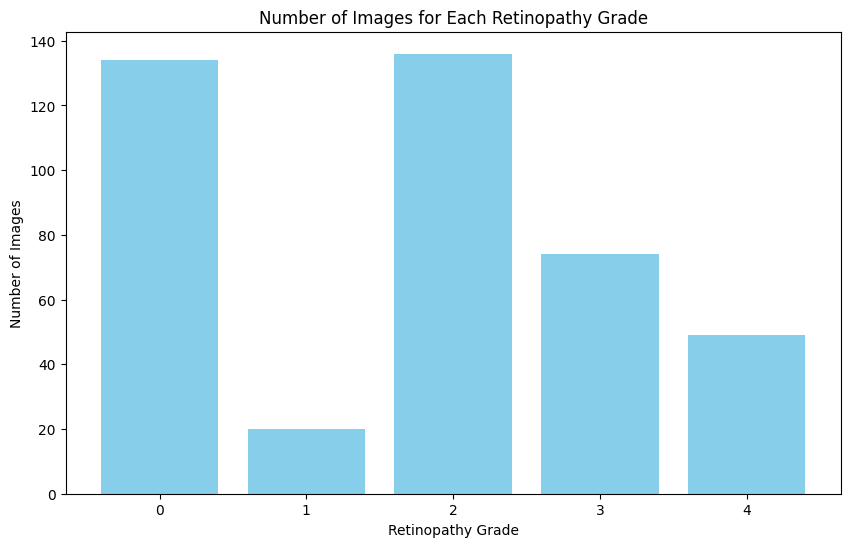

In [ ]:
# import pandas as pd
# import matplotlib.pyplot as plt

# # Load the CSV file containing labels
# train_csv_path = '/content/drive/MyDrive/docs/2. Groundtruths/a. IDRiD_Disease Grading_Training Labels.csv'
# train_csv = pd.read_csv(train_csv_path)

# # Count the number of images for each label
# label_counts = train_csv['Retinopathy grade'].value_counts()

# # Create a bar graph
# plt.figure(figsize=(10, 6))
# plt.bar(label_counts.index, label_counts.values, color='skyblue')
# plt.xlabel('Retinopathy Grade')
# plt.ylabel('Number of Images')
# plt.title('Number of Images for Each Retinopathy Grade')
# plt.xticks(label_counts.index, rotation=0)
# plt.show()


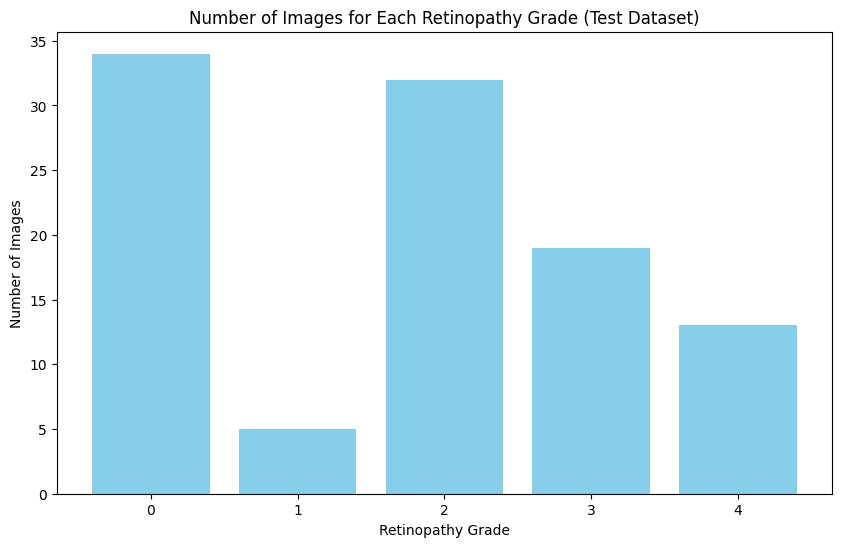

In [ ]:
# import pandas as pd
# import matplotlib.pyplot as plt

# # Load the CSV file containing labels for the test dataset
# test_csv_path = '/content/drive/MyDrive/docs/2. Groundtruths/b. IDRiD_Disease Grading_Testing Labels.csv'
# test_csv = pd.read_csv(test_csv_path)

# # Count the number of images for each label in the test dataset
# test_label_counts = test_csv['Retinopathy grade'].value_counts()

# # Create a bar graph for the test dataset
# plt.figure(figsize=(10, 6))
# plt.bar(test_label_counts.index, test_label_counts.values, color='skyblue')
# plt.xlabel('Retinopathy Grade')
# plt.ylabel('Number of Images')
# plt.title('Number of Images for Each Retinopathy Grade (Test Dataset)')
# plt.xticks(test_label_counts.index, rotation=0)
# plt.show()


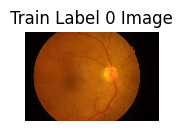

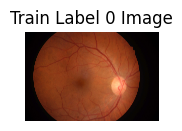

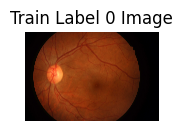

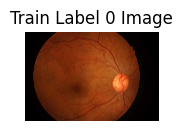

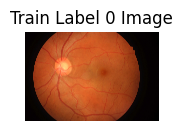

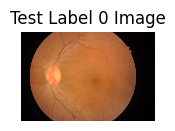

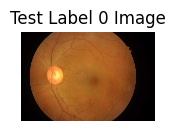

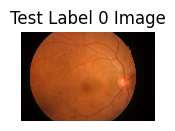

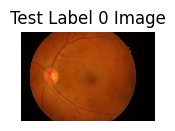

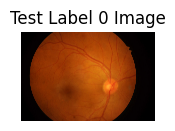

In [ ]:
# import os
# import pandas as pd
# from skimage import io
# import matplotlib.pyplot as plt

# # Define paths to CSV files and image folders
# train_csv_path = '/content/drive/MyDrive/docs/2. Groundtruths/a. IDRiD_Disease Grading_Training Labels.csv'
# test_csv_path = '/content/drive/MyDrive/docs/2. Groundtruths/b. IDRiD_Disease Grading_Testing Labels.csv'
# train_image_folder = '/content/drive/MyDrive/docs/1. Original Images/a. Training Set'
# test_image_folder = '/content/drive/MyDrive/docs/1. Original Images/b. Testing Set'

# # Load CSV files
# train_csv = pd.read_csv(train_csv_path)
# test_csv = pd.read_csv(test_csv_path)

# # Define the label "0"
# selected_label = 0

# # Initialize counters for printing 5 images
# train_print_count = 0
# test_print_count = 0

# # Print 5 images from the train dataset with the label "0"
# for index, row in train_csv.iterrows():
#     if row['Retinopathy grade'] == selected_label and train_print_count < 5:
#         image_file = row['Image name'] + '.jpg'
#         image_path = os.path.join(train_image_folder, image_file)
#         image = io.imread(image_path)

#         plt.figure(figsize=(10, 3))
#         plt.subplot(1, 5, train_print_count + 1)
#         plt.imshow(image)
#         plt.title(f'Train Label {selected_label} Image')
#         plt.axis('off')
#         train_print_count += 1

# # Print 5 images from the test dataset with the label "0"
# for index, row in test_csv.iterrows():
#     if row['Retinopathy grade'] == selected_label and test_print_count < 5:
#         image_file = row['Image name'] + '.jpg'
#         image_path = os.path.join(test_image_folder, image_file)
#         image = io.imread(image_path)

#         plt.figure(figsize=(10, 3))
#         plt.subplot(1, 5, test_print_count + 1)
#         plt.imshow(image)
#         plt.title(f'Test Label {selected_label} Image')
#         plt.axis('off')
#         test_print_count += 1

# plt.show()


In [ ]:
# import os
# import pandas as pd
# from skimage import io, transform
# import matplotlib.pyplot as plt

# # Define paths to CSV files and image folders
# train_csv_path = '/content/drive/MyDrive/docs/2. Groundtruths/a. IDRiD_Disease Grading_Training Labels.csv'
# test_csv_path = '/content/drive/MyDrive/docs/2. Groundtruths/b. IDRiD_Disease Grading_Testing Labels.csv'
# train_image_folder = '/content/drive/MyDrive/docs/1. Original Images/a. Training Set'
# test_image_folder = '/content/drive/MyDrive/docs/1. Original Images/b. Testing Set'

# # Load CSV files
# train_csv = pd.read_csv(train_csv_path)
# test_csv = pd.read_csv(test_csv_path)

# # Initialize lists to store images and labels
# train_images = []
# test_images = []

# # Set the maximum number of images to load
# max_train_images = 30
# max_test_images = 20

# # Load training images with Retinopathy grade 0
# for image_file in os.listdir(train_image_folder):
#     if image_file.endswith('.jpg') and len(train_images) < max_train_images:
#         image_path = os.path.join(train_image_folder, image_file)
#         image = io.imread(image_path)

#         # Use the 'Image name' column to match image filenames
#         image_name = image_file[:-4]  # Remove '.jpg' extension
#         label = train_csv[train_csv['Image name'] == image_name]['Retinopathy grade'].values
#         if len(label) > 0 and label[0] == 0:  # Check if label exists and is 0
#             train_images.append(image)

# # Load testing images with Retinopathy grade 0
# for image_file in os.listdir(test_image_folder):
#     if image_file.endswith('.jpg') and len(test_images) < max_test_images:
#         image_path = os.path.join(test_image_folder, image_file)
#         image = io.imread(image_path)

#         # Use the 'Image name' column to match image filenames
#         image_name = image_file[:-4]  # Remove '.jpg' extension
#         label = test_csv[test_csv['Image name'] == image_name]['Retinopathy grade'].values
#         if len(label) > 0 and label[0] == 0:  # Check if label exists and is 0
#             test_images.append(image)

# # Preprocess images (resize to 512x512, no normalization)
# def preprocess_images(images):
#     target_size = (512, 512)
#     preprocessed_images = [transform.resize(image, target_size) for image in images]
#     return preprocessed_images

# train_images_preprocessed = preprocess_images(train_images)
# test_images_preprocessed = preprocess_images(test_images)

# plt.figure(figsize=(15, 5))

# # Display the first 5 preprocessed images (or fewer if there are less than 5)
# for i in range(min(5, len(train_images_preprocessed))):
#     plt.subplot(1, 5, i+1)
#     plt.imshow(train_images_preprocessed[i])
#     plt.title('Retinopathy Grade: 0')
#     plt.axis('off')

# plt.show()



KeyboardInterrupt: ignored

In [ ]:
# import os
# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt
# from skimage import io, transform
# from tensorflow.keras.models import Sequential, Model
# from tensorflow.keras.layers import Dense, LeakyReLU, BatchNormalization, Reshape, Flatten, Input
# from tensorflow.keras.optimizers import Adam
# from tensorflow.keras.applications import VGG16

# # Define paths to CSV files and image folders
# train_csv_path = '/content/drive/MyDrive/docs/2. Groundtruths/a. IDRiD_Disease Grading_Training Labels.csv'
# test_csv_path = '/content/drive/MyDrive/docs/2. Groundtruths/b. IDRiD_Disease Grading_Testing Labels.csv'
# train_image_folder = '/content/drive/MyDrive/docs/1. Original Images/a. Training Set'
# test_image_folder = '/content/drive/MyDrive/docs/1. Original Images/b. Testing Set'

# # Load CSV files
# train_csv = pd.read_csv(train_csv_path)
# test_csv = pd.read_csv(test_csv_path)

# # Initialize lists to store images
# train_images = []
# test_images = []

# # Set the maximum number of images to load (e.g., 40)
# max_images = 40

# # Load training images and labels for Retinopathy Grade = 0
# for image_file in os.listdir(train_image_folder):
#     if image_file.endswith('.jpg') and len(train_images) < max_images:
#         image_path = os.path.join(train_image_folder, image_file)
#         image = io.imread(image_path)

#         # Use the 'Image name' column to match image filenames
#         image_name = image_file[:-4]  # Remove '.jpg' extension
#         label = train_csv.loc[train_csv['Image name'] == image_name, 'Retinopathy grade'].values[0]
#         if label == 0:
#             train_images.append(transform.resize(image, (256, 256)))  # Resize to 256x256

# # Load testing images and labels for Retinopathy Grade = 0
# for image_file in os.listdir(test_image_folder):
#     if image_file.endswith('.jpg') and len(test_images) < max_images:
#         image_path = os.path.join(test_image_folder, image_file)
#         image = io.imread(image_path)

#         # Use the 'Image name' column to match image filenames
#         image_name = image_file[:-4]  # Remove '.jpg' extension
#         label_match = test_csv.loc[test_csv['Image name'] == image_name, 'Retinopathy grade']

#         if not label_match.empty and label_match.values[0] == 0:
#             test_images.append(transform.resize(image, (256, 256)))  # Resize to 256x256

# # Define a VGG16-based feature extractor
# def build_feature_extractor():
#     base_model = VGG16(weights='imagenet', include_top=False, input_shape=(256, 256, 3))
#     for layer in base_model.layers:
#         layer.trainable = False  # Freeze VGG16 layers

#     model = Sequential()
#     model.add(base_model)
#     model.add(Flatten())
#     model.add(Dense(256))  # You can adjust the number of output features as needed
#     return model

# feature_extractor = build_feature_extractor()  # Define the feature extractor

# # Define the generator
# def build_generator():
#     model = Sequential()
#     model.add(Dense(256, input_dim=100))
#     model.add(LeakyReLU(0.2))
#     model.add(BatchNormalization(momentum=0.8))
#     model.add(Dense(512))
#     model.add(LeakyReLU(0.2))
#     model.add(BatchNormalization(momentum=0.8))
#     model.add(Dense(1024))
#     model.add(LeakyReLU(0.2))
#     model.add(BatchNormalization(momentum=0.8))
#     model.add(Dense(256 * 256 * 3, activation='tanh'))
#     model.add(Reshape((256, 256, 3)))
#     return model

# # Define the discriminator
# def build_discriminator():
#     model = Sequential()
#     model.add(Flatten(input_shape=(256, 256, 3)))
#     model.add(Dense(1024))
#     model.add(LeakyReLU(0.2))
#     model.add(Dense(512))
#     model.add(LeakyReLU(0.2))
#     model.add(Dense(256))
#     model.add(LeakyReLU(0.2))
#     model.add(Dense(1, activation='sigmoid'))
#     return model

# # Compile the discriminator and generator
# discriminator = build_discriminator()
# discriminator.compile(loss='binary_crossentropy', optimizer=Adam(0.0002, 0.5), metrics=['accuracy'])

# generator = build_generator()
# z = Input(shape=(100,))
# img = generator(z)

# discriminator.trainable = False  # Freeze the discriminator during GAN training

# validity = discriminator(img)

# combined = Model(z, validity)
# combined.compile(loss='binary_crossentropy', optimizer=Adam(0.0002, 0.5))

# # Training parameters
# epochs = 30000
# batch_size = 32
# save_interval = 1000

# # Adversarial ground truths
# valid = np.ones((batch_size, 1))
# fake = np.zeros((batch_size, 1))

# # Training the GAN
# def train_gan(epochs, batch_size):
#     num_samples = len(train_images)
#     num_batches = num_samples // batch_size

#     for epoch in range(epochs):
#         np.random.shuffle(train_images)

#         for batch_idx in range(num_batches):
#             start_idx = batch_idx * batch_size
#             end_idx = (batch_idx + 1) * batch_size
#             batch_images = np.array(train_images[start_idx:end_idx])

#             noise = np.random.normal(0, 1, (batch_size, 100))

#             gen_imgs = generator.predict(noise)

#             d_loss_real = discriminator.train_on_batch(batch_images, np.ones((batch_size, 1)))  # Use real images
#             d_loss_fake = discriminator.train_on_batch(gen_imgs, np.zeros((batch_size, 1)))  # Use generated images
#             d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)

#             noise = np.random.normal(0, 1, (batch_size, 100))
#             g_loss = combined.train_on_batch(noise, np.ones((batch_size, 1)))

#         print(f"Epoch {epoch}, D Loss: {d_loss[0]}, G Loss: {g_loss}")

#         if epoch % save_interval == 0:
#             save_generated_images(epoch)

# # Save generated images
# def save_generated_images(epoch, examples=10):
#     noise = np.random.normal(0, 1, (examples, 100))
#     gen_imgs = generator.predict(noise)
#     gen_imgs = 0.5 * gen_imgs + 0.5  # Rescale to [0, 1]

#     fig, axs = plt.subplots(1, examples, figsize=(20, 20))
#     cnt = 0
#     for i in range(examples):
#         axs[i].imshow(gen_imgs[cnt])
#         axs[i].axis('off')
#         cnt += 1
#     plt.savefig(f"gan_generated_image_epoch_{epoch}.png")
#     plt.close()

# # Train the GAN
# train_gan(epochs=epochs, batch_size=batch_size)



KeyboardInterrupt: ignored

In [ ]:
# import os
# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt
# from skimage import io, transform
# from tensorflow.keras.models import Sequential, Model
# from tensorflow.keras.layers import Dense, LeakyReLU, BatchNormalization, Reshape, Flatten, Input
# from tensorflow.keras.optimizers import Adam
# from tensorflow.keras.applications import VGG16

# # Define paths to CSV files and image folders
# train_csv_path = '/content/drive/MyDrive/Train Labels HDQ - Sheet1.csv'
# test_csv_path = '/content/drive/MyDrive/Test Labels HDQ - Sheet1.csv'
# train_image_folder = '/content/drive/MyDrive/HD Fundus'
# test_image_folder = '/content/drive/MyDrive/HD Fundus Test'

# # Load CSV files
# train_csv = pd.read_csv(train_csv_path)
# test_csv = pd.read_csv(test_csv_path)

# # Initialize lists to store images
# train_images = []
# test_images = []

# # Set the maximum number of images to load (e.g., 40)
# max_images = 40

# # Load training images and labels for Retinopathy Grade = 0
# for image_file in os.listdir(train_image_folder):
#     if image_file.endswith('.jpg') and len(train_images) < max_images:
#         image_path = os.path.join(train_image_folder, image_file)
#         image = io.imread(image_path)

#         # Use the 'Image name' column to match image filenames
#         image_name = image_file[:-4]  # Remove '.jpg' extension
#         label = train_csv.loc[train_csv['Image name'] == image_name, 'Retinopathy grade'].values[0]
#         if label == 1:
#             train_images.append(transform.resize(image, (256, 256)))  # Resize to 256x256

# # Load testing images and labels for Retinopathy Grade = 0
# for image_file in os.listdir(test_image_folder):
#     if image_file.endswith('.jpg') and len(test_images) < max_images:
#         image_path = os.path.join(test_image_folder, image_file)
#         image = io.imread(image_path)

#         # Use the 'Image name' column to match image filenames
#         image_name = image_file[:-4]  # Remove '.jpg' extension
#         label_match = test_csv.loc[test_csv['Image name'] == image_name, 'Retinopathy grade']

#         if not label_match.empty and label_match.values[0] == 1:
#             test_images.append(transform.resize(image, (256, 256)))  # Resize to 256x256

# # Define a VGG16-based feature extractor
# def build_feature_extractor():
#     base_model = VGG16(weights='imagenet', include_top=False, input_shape=(256, 256, 3))
#     for layer in base_model.layers:
#         layer.trainable = False  # Freeze VGG16 layers

#     model = Sequential()
#     model.add(base_model)
#     model.add(Flatten())
#     model.add(Dense(256))  # You can adjust the number of output features as needed
#     return model

# feature_extractor = build_feature_extractor()  # Define the feature extractor

# # Define the generator
# def build_generator():
#     model = Sequential()
#     model.add(Dense(256, input_dim=100))
#     model.add(LeakyReLU(0.2))
#     model.add(BatchNormalization(momentum=0.8))
#     model.add(Dense(512))
#     model.add(LeakyReLU(0.2))
#     model.add(BatchNormalization(momentum=0.8))
#     model.add(Dense(1024))
#     model.add(LeakyReLU(0.2))
#     model.add(BatchNormalization(momentum=0.8))
#     model.add(Dense(256 * 256 * 3, activation='tanh'))
#     model.add(Reshape((256, 256, 3)))
#     return model

# # Define the discriminator
# def build_discriminator():
#     model = Sequential()
#     model.add(Flatten(input_shape=(256, 256, 3)))
#     model.add(Dense(1024))
#     model.add(LeakyReLU(0.2))
#     model.add(Dense(512))
#     model.add(LeakyReLU(0.2))
#     model.add(Dense(256))
#     model.add(LeakyReLU(0.2))
#     model.add(Dense(1, activation='sigmoid'))
#     return model

# # Compile the discriminator and generator
# discriminator = build_discriminator()
# discriminator.compile(loss='binary_crossentropy', optimizer=Adam(0.0002, 0.5), metrics=['accuracy'])

# generator = build_generator()
# z = Input(shape=(100,))
# img = generator(z)

# discriminator.trainable = False  # Freeze the discriminator during GAN training

# validity = discriminator(img)

# combined = Model(z, validity)
# combined.compile(loss='binary_crossentropy', optimizer=Adam(0.0002, 0.5))

# # Training parameters
# epochs = 30000
# batch_size = 32
# save_interval = 1000

# # Adversarial ground truths
# valid = np.ones((batch_size, 1))
# fake = np.zeros((batch_size, 1))

# # Training the GAN
# # Training the GAN
# # Training the GAN
# def train_gan(epochs, batch_size):
#     num_samples = len(train_images)
#     num_batches = num_samples // batch_size

#     for epoch in range(epochs):
#         np.random.shuffle(train_images)
#         d_loss = 0.0  # Initialize d_loss before the loop
#         g_loss = 0.0

#         if num_batches == 0:
#             num_batches = 1  # Ensure at least one batch

#         for batch_idx in range(num_batches):
#             start_idx = batch_idx * batch_size
#             end_idx = (batch_idx + 1) * batch_size
#             batch_images = np.array(train_images[start_idx:end_idx])

#             if batch_images.shape[0] == 0:
#                 continue  # Skip empty batches

#             noise = np.random.normal(0, 1, (batch_images.shape[0], 100))

#             gen_imgs = generator.predict(noise)

#             d_loss_real = discriminator.train_on_batch(batch_images, np.ones((batch_images.shape[0], 1)))  # Use real images
#             d_loss_fake = discriminator.train_on_batch(gen_imgs, np.zeros((batch_images.shape[0], 1)))  # Use generated images
#             d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)

#             noise = np.random.normal(0, 1, (batch_images.shape[0], 100))
#             g_loss = combined.train_on_batch(noise, np.ones((batch_images.shape[0], 1)))

#         print(f"Epoch {epoch}, D Loss: {d_loss}, G Loss: {g_loss}")

#         if epoch % save_interval == 0:
#             save_generated_images(epoch)



# # Save generated images
# def save_generated_images(epoch, examples=10):
#     noise = np.random.normal(0, 1, (examples, 100))
#     gen_imgs = generator.predict(noise)
#     gen_imgs = 0.5 * gen_imgs + 0.5  # Rescale to [0, 1]

#     fig, axs = plt.subplots(1, examples, figsize=(20, 20))
#     cnt = 0
#     for i in range(examples):
#         axs[i].imshow(gen_imgs[cnt])
#         axs[i].axis('off')
#         cnt += 1
#     plt.savefig(f"gan_generated_image_epoch_{epoch}.png")
#     plt.close()

# # Train the GAN
# train_gan(epochs=epochs, batch_size=batch_size)



1/1 [==============================] - 0s 357ms/step
Epoch 0, D Loss: [0.67852408 0.75      ], G Loss: 0.7983253002166748
1/1 [==============================] - 0s 263ms/step
Epoch 1, D Loss: [0.17397976 1.        ], G Loss: 2.1934967041015625
1/1 [==============================] - 0s 299ms/step
Epoch 2, D Loss: [0.24924605 0.83333334], G Loss: 2.53680419921875
1/1 [==============================] - 0s 271ms/step
Epoch 3, D Loss: [0.29408327 0.83333334], G Loss: 5.979638576507568
1/1 [==============================] - 0s 247ms/step
Epoch 4, D Loss: [0.02114387 1.        ], G Loss: 10.175383567810059
1/1 [==============================] - 0s 244ms/step
Epoch 5, D Loss: [1.51385807 0.83333334], G Loss: 14.534512519836426
1/1 [==============================] - 0s 245ms/step
Epoch 6, D Loss: [2.00121975 0.66666667], G Loss: 8.820871353149414
1/1 [==============================] - 0s 254ms/step
Epoch 7, D Loss: [1.69660985 0.83333334], G Loss: 9.570660591125488
1/1 [========================

In [ ]:
# import os
# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt
# from skimage import io, transform
# from tensorflow.keras.models import Sequential, Model
# from tensorflow.keras.layers import Dense, LeakyReLU, BatchNormalization, Reshape, Flatten, Input
# from tensorflow.keras.optimizers import Adam
# from tensorflow.keras.applications import VGG16
# import cv2  # OpenCV for image processing

# # Define paths to CSV files and image folders
# train_csv_path = '/content/drive/MyDrive/docs/2. Groundtruths/a. IDRiD_Disease Grading_Training Labels.csv'
# test_csv_path = '/content/drive/MyDrive/docs/2. Groundtruths/b. IDRiD_Disease Grading_Testing Labels.csv'
# train_image_folder = '/content/drive/MyDrive/docs/1. Original Images/a. Training Set'
# test_image_folder = '/content/drive/MyDrive/docs/1. Original Images/b. Testing Set'

# # Load CSV files
# train_csv = pd.read_csv(train_csv_path)
# test_csv = pd.read_csv(test_csv_path)

# # Initialize lists to store images
# train_images = []
# test_images = []

# # Set the maximum number of images to load (e.g., 40)
# max_images = 40

# # Load training images and labels for Retinopathy Grade = 0
# for image_file in os.listdir(train_image_folder):
#     if image_file.endswith('.jpg') and len(train_images) < max_images:
#         image_path = os.path.join(train_image_folder, image_file)
#         image = io.imread(image_path)

#         # Use the 'Image name' column to match image filenames
#         image_name = image_file[:-4]  # Remove '.jpg' extension
#         label = train_csv.loc[train_csv['Image name'] == image_name, 'Retinopathy grade'].values[0]
#         if label == 0:
#             train_images.append(transform.resize(image, (256, 256)))  # Resize to 256x256

# # Load testing images and labels for Retinopathy Grade = 0
# for image_file in os.listdir(test_image_folder):
#     if image_file.endswith('.jpg') and len(test_images) < max_images:
#         image_path = os.path.join(test_image_folder, image_file)
#         image = io.imread(image_path)

#         # Use the 'Image name' column to match image filenames
#         image_name = image_file[:-4]  # Remove '.jpg' extension
#         label_match = test_csv.loc[test_csv['Image name'] == image_name, 'Retinopathy grade']

#         if not label_match.empty and label_match.values[0] == 0:
#             test_images.append(transform.resize(image, (256, 256)))  # Resize to 256x256

# # Preprocess images
# def preprocess_images(images):
#     preprocessed_images = []
#     for image in images:
#         # Convert to grayscale
#         gray_image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

#         # Apply CLAHE to enhance contrast
#         clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
#         clahe_image = clahe.apply(gray_image)

#         # Convert back to RGB format (3 channels)
#         clahe_image_rgb = cv2.cvtColor(clahe_image, cv2.COLOR_GRAY2RGB)

#         preprocessed_images.append(clahe_image_rgb)

#     return np.array(preprocessed_images)

# # Preprocess training images
# train_images_preprocessed = preprocess_images(train_images)

# # Preprocess testing images
# test_images_preprocessed = preprocess_images(test_images)

# # Define a VGG16-based feature extractor
# def build_feature_extractor():
#     base_model = VGG16(weights='imagenet', include_top=False, input_shape=(256, 256, 3))
#     for layer in base_model.layers:
#         layer.trainable = False  # Freeze VGG16 layers

#     model = Sequential()
#     model.add(base_model)
#     model.add(Flatten())
#     model.add(Dense(256))  # You can adjust the number of output features as needed
#     return model

# feature_extractor = build_feature_extractor()  # Define the feature extractor

# # Define the generator
# def build_generator():
#     model = Sequential()
#     model.add(Dense(256, input_dim=100))
#     model.add(LeakyReLU(0.2))
#     model.add(BatchNormalization(momentum=0.8))
#     model.add(Dense(512))
#     model.add(LeakyReLU(0.2))
#     model.add(BatchNormalization(momentum=0.8))
#     model.add(Dense(1024))
#     model.add(LeakyReLU(0.2))
#     model.add(BatchNormalization(momentum=0.8))
#     model.add(Dense(256 * 256 * 3, activation='tanh'))
#     model.add(Reshape((256, 256, 3)))
#     return model

# # Define the discriminator
# def build_discriminator():
#     model = Sequential()
#     model.add(Flatten(input_shape=(256, 256, 3)))
#     model.add(Dense(1024))
#     model.add(LeakyReLU(0.2))
#     model.add(Dense(512))
#     model.add(LeakyReLU(0.2))
#     model.add(Dense(256))
#     model.add(LeakyReLU(0.2))
#     model.add(Dense(1, activation='sigmoid'))
#     return model

# # Compile the discriminator and generator
# discriminator = build_discriminator()
# discriminator.compile(loss='binary_crossentropy', optimizer=Adam(0.0002, 0.5), metrics=['accuracy'])

# generator = build_generator()
# z = Input(shape=(100,))
# img = generator(z)

# discriminator.trainable = False  # Freeze the discriminator during GAN training

# validity = discriminator(img)

# combined = Model(z, validity)
# combined.compile(loss='binary_crossentropy', optimizer=Adam(0.0002, 0.5))

# # Training parameters
# epochs = 30000
# batch_size = 32
# save_interval = 1000

# # Adversarial ground truths
# valid = np.ones((batch_size, 1))
# fake = np.zeros((batch_size, 1))

# # Training the GAN
# def train_gan(epochs, batch_size):
#     num_samples = len(train_images)
#     num_batches = num_samples // batch_size

#     for epoch in range(epochs):
#         np.random.shuffle(train_images)

#         for batch_idx in range(num_batches):
#             start_idx = batch_idx * batch_size
#             end_idx = (batch_idx + 1) * batch_size
#             batch_images = np.array(train_images[start_idx:end_idx])

#             noise = np.random.normal(0, 1, (batch_size, 100))

#             gen_imgs = generator.predict(noise)

#             d_loss_real = discriminator.train_on_batch(batch_images, np.ones((batch_size, 1)))  # Use real images
#             d_loss_fake = discriminator.train_on_batch(gen_imgs, np.zeros((batch_size, 1)))  # Use generated images
#             d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)

#             noise = np.random.normal(0, 1, (batch_size, 100))
#             g_loss = combined.train_on_batch(noise, np.ones((batch_size, 1)))

#         print(f"Epoch {epoch}, D Loss: {d_loss[0]}, G Loss: {g_loss}")

#         if epoch % save_interval == 0:
#             save_generated_images(epoch)

# # Save generated images
# def save_generated_images(epoch, examples=10):
#     noise = np.random.normal(0, 1, (examples, 100))
#     gen_imgs = generator.predict(noise)
#     gen_imgs = 0.5 * gen_imgs + 0.5  # Rescale to [0, 1]

#     fig, axs = plt.subplots(1, examples, figsize=(20, 20))
#     cnt = 0
#     for i in range(examples):
#         axs[i].imshow(gen_imgs[cnt])
#         axs[i].axis('off')
#         cnt += 1
#     plt.savefig(f"gan_generated_image_epoch_{epoch}.png")
#     plt.close()

# # Train the GAN
# train_gan(epochs=epochs, batch_size=batch_size)



In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, transform
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, LeakyReLU, BatchNormalization, Reshape, Flatten, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import LearningRateScheduler
from tensorflow.keras.losses import BinaryCrossentropy

# Define paths to image folder
image_folder = '/content/drive/MyDrive/HD Fundus'

# Initialize a list to store images
images = []

# Set the maximum number of images to load (e.g., 40)
max_images = 40

# Load and preprocess images
for image_file in os.listdir(image_folder):
    if image_file.endswith('.jpg') and len(images) < max_images:
        image_path = os.path.join(image_folder, image_file)
        image = io.imread(image_path)
        image = transform.resize(image, (64, 64))  # Resize to 64x64 for simplicity
        images.append(image)

# Generator
generator = Sequential()
generator.add(Dense(256, input_dim=100))
generator.add(LeakyReLU(0.2))
generator.add(BatchNormalization(momentum=0.8))
generator.add(Dense(64 * 64 * 3, activation='tanh'))
generator.add(Reshape((64, 64, 3)))

# Discriminator
discriminator = Sequential()
discriminator.add(Flatten(input_shape=(64, 64, 3)))
discriminator.add(Dense(256))
discriminator.add(LeakyReLU(0.2))
discriminator.add(Dense(1, activation='sigmoid'))

# Compile the discriminator and generator
discriminator.compile(loss=BinaryCrossentropy(from_logits=True), optimizer=Adam(0.0002, 0.5), metrics=['accuracy'])
discriminator.trainable = False

z = Input(shape=(100,))
img = generator(z)

validity = discriminator(img)

combined = Model(z, validity)
combined.compile(loss=BinaryCrossentropy(from_logits=True), optimizer=Adam(0.0002, 0.5))

# Learning rate scheduling
def lr_schedule(epoch):
    lr = 0.0002
    if epoch > 1000:
        lr = 0.0001
    return lr

lr_scheduler = LearningRateScheduler(lr_schedule)

# Training parameters
epochs = 30000
batch_size = 16  # Decreased batch size
save_interval = 100

# Adversarial ground truths
valid = np.ones((batch_size, 1))
fake = np.zeros((batch_size, 1))

# Label smoothing
smooth_real_labels = 0.9
smooth_fake_labels = 0.1

# Define a function to train the GAN
def train_gan(epochs, batch_size):
    num_samples = len(images)
    num_batches = num_samples // batch_size

    for epoch in range(epochs):
        np.random.shuffle(images)
        d_loss = 0.0
        g_loss = 0.0

        # Ensure at least one batch
        if num_batches == 0:
            num_batches = 1

        for batch_idx in range(num_batches):
            start_idx = batch_idx * batch_size
            end_idx = (batch_idx + 1) * batch_size
            batch_images = np.array(images[start_idx:end_idx])

            if batch_images.shape[0] == 0:
                continue  # Skip empty batches

            noise = np.random.normal(0, 1, (batch_images.shape[0], 100))

            gen_imgs = generator.predict(noise)

            d_loss_real = discriminator.train_on_batch(batch_images, smooth_real_labels * np.ones((batch_images.shape[0], 1)))
            d_loss_fake = discriminator.train_on_batch(gen_imgs, smooth_fake_labels * np.zeros((batch_images.shape[0], 1)))

            d_loss = 0.5 * (d_loss_real[0] + d_loss_fake[0])

            noise = np.random.normal(0, 1, (batch_images.shape[0], 100))
            g_loss = combined.train_on_batch(noise, smooth_real_labels * np.ones((batch_images.shape[0], 1)))

        print(f"Epoch {epoch}, D Loss: {d_loss}, G Loss: {g_loss}")

        if epoch % save_interval == 0:
            save_generated_images(epoch)


# Define a function to save generated images
def save_generated_images(epoch, examples=10):
    noise = np.random.normal(0, 1, (examples, 100))
    gen_imgs = generator.predict(noise)
    gen_imgs = 0.5 * gen_imgs + 0.5  # Rescale to [0, 1]

    fig, axs = plt.subplots(1, examples, figsize=(20, 20))
    cnt = 0
    for i in range(examples):
        axs[i].imshow(gen_imgs[cnt])
        axs[i].axis('off')
        cnt += 1
    plt.savefig(f"gan_generated_image_epoch_{epoch}.png")
    plt.close()

# Train the GAN
train_gan(epochs=epochs, batch_size=batch_size)




Streaming output truncated to the last 5000 lines.
Epoch 7260, D Loss: 0.7454503774642944, G Loss: 0.9281212687492371
1/1 [==============================] - 0s 31ms/step
Epoch 7261, D Loss: 0.7492338716983795, G Loss: 0.9434835314750671
1/1 [==============================] - 0s 37ms/step
Epoch 7262, D Loss: 0.7550795674324036, G Loss: 0.9491370320320129
1/1 [==============================] - 0s 62ms/step
Epoch 7263, D Loss: 0.7403892576694489, G Loss: 0.9131501913070679
1/1 [==============================] - 0s 50ms/step
Epoch 7264, D Loss: 0.7556167542934418, G Loss: 0.8786837458610535
1/1 [==============================] - 0s 41ms/step
Epoch 7265, D Loss: 0.7560185790061951, G Loss: 0.8595450520515442
1/1 [==============================] - 0s 42ms/step
Epoch 7266, D Loss: 0.7452039122581482, G Loss: 0.8817456960678101
1/1 [==============================] - 0s 35ms/step
Epoch 7267, D Loss: 0.7427968084812164, G Loss: 0.8594328165054321
1/1 [==============================] - 0s 44ms/st